# Enunciado
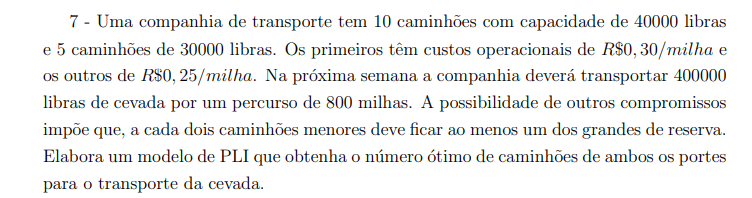

In [ ]:
import gurobipy as gp
from gurobipy import GRB

# Modelo 
m = gp.Model("Transporte_Cevada")

#  Dados 
tipos = ["Grande", "Pequeno"]
dist = 800
carga = 400_000

dados = {
    "disponiveis": {"Grande": 10, "Pequeno": 5},
    "capacidade":  {"Grande": 40_000, "Pequeno": 30_000},
    "custo_milha": {"Grande": 0.30, "Pequeno": 0.25}
}

custo_viagem = {t: dados["custo_milha"][t] * dist for t in tipos}

#  Variáveis 
x = m.addVars(tipos, vtype=GRB.INTEGER, name="Caminhoes")

# Função Objetivo 
m.setObjective(gp.quicksum(custo_viagem[t] * x[t] for t in tipos), GRB.MINIMIZE)

#  Restrições 
m.addConstr(gp.quicksum(dados["capacidade"][t] * x[t] for t in tipos) >= carga, "Capacidade_Total")

for t in tipos:
    m.addConstr(x[t] <= dados["disponiveis"][t], f"Disponibilidade_{t}")

m.addConstr(2 * x["Grande"] + x["Pequeno"] <= 20, "Regra_Reserva")
m.addConstr(x["Pequeno"] >= 2, "Min_Pequenos")

# Otimização 
m.optimize()

#  Resultados
if m.status == GRB.OPTIMAL:
    print("\n" + "-"*55)
    print("SOLUÇÃO ÓTIMA ENCONTRADA")
    print("-"*55)
    print(f"Custo Operacional Mínimo: R$ {m.objVal:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
    print("-"*55)

    print("PLANO DE TRANSPORTE IDEAL:")
    for t in tipos:
        if x[t].x > 1e-6:
            print(f"  - {t}: {int(x[t].x)} caminhões")

    carga_transp = sum(dados["capacidade"][t] * x[t].x for t in tipos)
    print(f"\nCarga total transportada: {carga_transp:,.0f} / {carga:,} libras".replace(",", "."))
    print("-"*55)
else:
    print("\n Nenhuma solução ótima encontrada.")


# Resultados
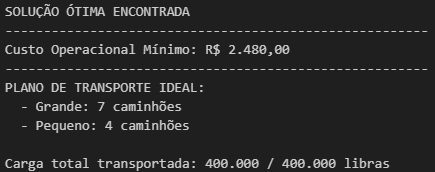
# Nova restrição: 
A quantidade minima de caminhoes pequenos >= 2